#  DATA SCIENCE:CASE STUDY #
## Data Investigation and Exploratory Analysis for Mavencloudlimited_call_records
*** Author: Nkahebwa Norris(2023) ***
#### Solution 4

In [55]:
#### Importing libraries that are going to be used for the remainder of the class

#import the data manipulation libraries
import pandas as pd
import numpy as np
import statistics as stat

#for visualization 
import matplotlib.pyplot as plt
import seaborn as sbn


# for data splitting, transforming and model training
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [56]:
# load the dataset
data = pd.read_csv("/home/future/Desktop/Data_science_class/Case_Study/drive-download-20230314T185227Z-001/mavencloudlimited_call_records.csv")

In [57]:
# Create table for missing data analysis
def draw_missing_data_table(dataset):
    total = dataset.isnull().sum().sort_values(ascending=False)
    percent = (dataset.isnull().sum()/dataset.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total Nulls in dataset', 'Percent of Nulls'])
    return missing_data

In [58]:
col_names = ['Incoming', 'Outgoing']

#########Confusion Matrix Plot true vs pred values  #######
def CM(y_test, y_pred_test, col_names, model='model', fs=(8,6)):
    
    plt.rcParams.update({'font.size': 14})
    
    # Forming confusion matrix
    c_matrix = confusion_matrix(y_test, y_pred_test)
    
    plt.figure(figsize=fs)
    sbn.heatmap(c_matrix, annot=True, annot_kws={'size':15},
                fmt=".0f", cmap=plt.cm.Purples, linewidths=5)
    
    tick_marks = np.arange(len(col_names))
    plt.xticks(tick_marks + 0.5, col_names)
    plt.yticks(tick_marks + 0.5, col_names, rotation=0)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title(f'Confusion Matrix for {model} Model')
    plt.show()

In [59]:
# Plot learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1, 
                        train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, 
                     alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Validation score")

    plt.legend(loc="best")
    return plt


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32026 entries, 0 to 32025
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   call_id                32026 non-null  int64  
 1   destination_person_id  32026 non-null  int64  
 2   source_person_id       32026 non-null  int64  
 3   account_age            32026 non-null  int64  
 4   account_state          32026 non-null  object 
 5   occupation             31931 non-null  object 
 6   language               32025 non-null  object 
 7   call_direction         32026 non-null  object 
 8   call_duration          32026 non-null  float64
 9   call_outcome           32026 non-null  object 
 10  call_end_date          32026 non-null  object 
 11  call_topics            32026 non-null  object 
 12  call_topic_group       32026 non-null  object 
dtypes: float64(1), int64(4), object(8)
memory usage: 3.2+ MB


In [61]:
data

,call_id,destination_person_id,source_person_id,account_age,account_state,occupation,language,call_direction,call_duration,call_outcome,call_end_date,call_topics,call_topic_group
0,2807990,86394,269898,301,In Repayment,Farmer,Luganda,Incoming,0.78,Call Resolved,10/21/17 04:01 AM,Call Dropped,Other
1,2807991,86394,320367,122,In Repayment,Other,Luganda,Incoming,1.93,Call Resolved,10/21/17 04:04 AM,Code Not Received,Codes
2,2807992,212967,129042,695,In Repayment,Mechanic / Technician,Luganda,Incoming,4.90,Call Resolved,10/21/17 04:05 AM,RP Remote Technical,Accessory Technical Issue
3,2807993,114159,372282,22,In Repayment,Farmer,Lango,Incoming,3.77,Call Resolved,10/21/17 04:06 AM,Code Not Received,Codes
4,2807994,86394,366749,44,In Repayment,Electrician,Luganda,Incoming,2.62,Call Resolved,10/21/17 04:07 AM,Code Not Received,Codes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32021,2855830,338414,361079,68,In Repayment,Small Business Owner,Lunyankore,Incoming,6.55,Call Resolved,11/03/17 03:08 PM,MM Issue,Finance
32022,2855832,157397,302921,183,In Repayment,Farmer,Ma'di,Incoming,12.90,Call Resolved,11/03/17 03:09 PM,"Redeem Code, Code Entry Support",Codes
32023,2855835,80646,229800,386,In Repayment,Farmer,Luganda,Incoming,1.25,Call Resolved,11/03/17 03:09 PM,Ended Call- Hearing/Speaking Issues,Other
32024,2855836,338372,8029,1146,Cancelled,Boda Boda,English,Incoming,2.98,Call Resolved,11/03/17 03:10 PM,Account Association,Sales


In [62]:
#we create a copy of the data
df=data.copy()

In [63]:
df.head(5)

,call_id,destination_person_id,source_person_id,account_age,account_state,occupation,language,call_direction,call_duration,call_outcome,call_end_date,call_topics,call_topic_group
0,2807990,86394,269898,301,In Repayment,Farmer,Luganda,Incoming,0.78,Call Resolved,10/21/17 04:01 AM,Call Dropped,Other
1,2807991,86394,320367,122,In Repayment,Other,Luganda,Incoming,1.93,Call Resolved,10/21/17 04:04 AM,Code Not Received,Codes
2,2807992,212967,129042,695,In Repayment,Mechanic / Technician,Luganda,Incoming,4.90,Call Resolved,10/21/17 04:05 AM,RP Remote Technical,Accessory Technical Issue
3,2807993,114159,372282,22,In Repayment,Farmer,Lango,Incoming,3.77,Call Resolved,10/21/17 04:06 AM,Code Not Received,Codes
4,2807994,86394,366749,44,In Repayment,Electrician,Luganda,Incoming,2.62,Call Resolved,10/21/17 04:07 AM,Code Not Received,Codes


In [64]:
# Create a table for missing data analysis
def draw_missing_data_table(dataset):
    total = dataset.isnull().sum().sort_values(ascending=False)
    percent = (dataset.isnull().sum()/dataset.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total Nulls in dataset', 'Percent of Nulls'])
    return missing_data

In [65]:
# Analyse missing data
draw_missing_data_table(df)

,Total Nulls in dataset,Percent of Nulls
occupation,95,0.002966
language,1,0.000031
call_id,0,0.000000
destination_person_id,0,0.000000
source_person_id,0,0.000000
account_age,0,0.000000
account_state,0,0.000000
call_direction,0,0.000000
call_duration,0,0.000000
call_outcome,0,0.000000


In [66]:
#Lets drop the missing values
df=df.dropna()
# Analyse missing data
draw_missing_data_table(df)

,Total Nulls in dataset,Percent of Nulls
call_id,0,0.0
destination_person_id,0,0.0
source_person_id,0,0.0
account_age,0,0.0
account_state,0,0.0
occupation,0,0.0
language,0,0.0
call_direction,0,0.0
call_duration,0,0.0
call_outcome,0,0.0


In [67]:
# Lets define a function to apply to each row of the DataFrame
def check_churn(row):
    if row["account_state"] in ["Suspended", "Cancelled"]:
        return "yes"
    elif row["account_state"] in ["Complete", "In Repayment"]:
        return "no"
    else:
        return "unknown"

# Now apply the function to each row of the DataFrame and create a new column called "churn"
df["churn"] = df.apply([check_churn], axis=1)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31931 entries, 0 to 32025
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   call_id                31931 non-null  int64  
 1   destination_person_id  31931 non-null  int64  
 2   source_person_id       31931 non-null  int64  
 3   account_age            31931 non-null  int64  
 4   account_state          31931 non-null  object 
 5   occupation             31931 non-null  object 
 6   language               31931 non-null  object 
 7   call_direction         31931 non-null  object 
 8   call_duration          31931 non-null  float64
 9   call_outcome           31931 non-null  object 
 10  call_end_date          31931 non-null  object 
 11  call_topics            31931 non-null  object 
 12  call_topic_group       31931 non-null  object 
 13  churn                  31931 non-null  object 
dtypes: float64(1), int64(4), object(9)
memory usage: 3.7+ 

In [69]:
#selecting the necessary columns from the dataframe
# or dropping unwanted columns
df = df.drop(['call_id', 'destination_person_id','source_person_id'], axis=1)
df

,account_age,account_state,occupation,language,call_direction,call_duration,call_outcome,call_end_date,call_topics,call_topic_group,churn
0,301,In Repayment,Farmer,Luganda,Incoming,0.78,Call Resolved,10/21/17 04:01 AM,Call Dropped,Other,no
1,122,In Repayment,Other,Luganda,Incoming,1.93,Call Resolved,10/21/17 04:04 AM,Code Not Received,Codes,no
2,695,In Repayment,Mechanic / Technician,Luganda,Incoming,4.90,Call Resolved,10/21/17 04:05 AM,RP Remote Technical,Accessory Technical Issue,no
3,22,In Repayment,Farmer,Lango,Incoming,3.77,Call Resolved,10/21/17 04:06 AM,Code Not Received,Codes,no
4,44,In Repayment,Electrician,Luganda,Incoming,2.62,Call Resolved,10/21/17 04:07 AM,Code Not Received,Codes,no
...,...,...,...,...,...,...,...,...,...,...,...
32021,68,In Repayment,Small Business Owner,Lunyankore,Incoming,6.55,Call Resolved,11/03/17 03:08 PM,MM Issue,Finance,no
32022,183,In Repayment,Farmer,Ma'di,Incoming,12.90,Call Resolved,11/03/17 03:09 PM,"Redeem Code, Code Entry Support",Codes,no
32023,386,In Repayment,Farmer,Luganda,Incoming,1.25,Call Resolved,11/03/17 03:09 PM,Ended Call- Hearing/Speaking Issues,Other,no
32024,1146,Cancelled,Boda Boda,English,Incoming,2.98,Call Resolved,11/03/17 03:10 PM,Account Association,Sales,yes


In [70]:
#Uisng labelEncorder to encode the categorical values

le=LabelEncoder()
def encode(data_set, column):
    data_set[str(column)] = le.fit_transform(data_set[str(column)])
    

In [71]:
#Pass the column names to encode into a list
list_of_columns = ['account_state', 'occupation', 'language','call_direction','call_outcome','call_topics','call_topic_group','call_end_date','churn']

for item in list_of_columns:
    encode(df,item)
#Display part of the dataframe
df.sample(5)

,account_age,account_state,occupation,language,call_direction,call_duration,call_outcome,call_end_date,call_topics,call_topic_group,churn
15741,848,2,32,3,0,20.57,0,5377,451,10,0
17418,343,2,11,21,0,1.90,0,5164,261,3,0
3614,753,2,24,3,1,3.52,3,1560,331,9,0
29081,0,2,11,11,1,23.55,0,10197,1191,8,0
29404,513,2,18,24,1,14.22,0,10320,331,9,0


In [72]:
df.call_direction.unique()

array([0, 1])

#### Method One: Logistic Regression

In [73]:
#Select the values for dependent and independent variables 
X = df.drop('call_direction', 1)
y = df.call_direction

/home/future/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [74]:
#Split the dataset for training testing purposes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [75]:
# Summary counts 
y_test.value_counts()

0    7255
1    2325
Name: call_direction, dtype: int64

In [76]:
#Lets Fit the Logistic Regression model
'''
To build a logistic regression model, we need to create an instance of LogisticRegression() class and use x_train,
y_train to train the model using the fit() method of that class. 
Now, the variable lr_model is an instance of the LogisticRegression() class.
 
'''

# create an object of the logistic regression class
lr_call_direction = LogisticRegression(max_iter = 100000)

# fit the model
lr_call_direction = lr_call_direction.fit(X_train, y_train)

# make predictions
y_pred = lr_call_direction.predict(X_test)

#print the tunable parameters (kept as default)
params = lr_call_direction.get_params()
print(params)

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [77]:
#Printing model parameters
print('Intercept: \n', lr_call_direction.intercept_)
print('Coefficients: \n', lr_call_direction.coef_)

Intercept: 
 [-0.61956325]
Coefficients: 
 [[ 9.24418648e-04 -1.13228908e+00 -1.63296000e-02 -5.49747721e-02
  -4.98988587e-02  2.96579134e-01 -5.08348504e-05 -1.03221772e-03
   4.41496437e-01 -3.00927128e-02]]


In [78]:
# Compute the odds ratio estimates
np.exp(lr_call_direction.coef_)

array([[1.00092485, 0.32229465, 0.98380301, 0.94650903, 0.95132564,
        1.34524901, 0.99994917, 0.99896831, 1.55503249, 0.97035556]])

* Upon exponentiating each regressor coefficient, we get odds ratios. 
* This means that for a single unit change in the independent variable, the log of odds will consquently change by a factor indicated by the beta coefficient while holding all other variables constant. 
* Since we have fitted our model, we can continue to make predictions using the predict() function by passing the values of x_test to this method.
* This will be succeeded by comparing the predicted values(y_pred) with y_test values to ascertain the accuracy of the model.(see below)

In [79]:
#Actual value and the predicted value
a = pd.DataFrame({'Actual value': y_test, 'Predicted value':y_pred})
a.sample(20)

,Actual value,Predicted value
23318,1,0
9733,0,0
26602,1,1
11723,0,0
27559,1,1
30006,0,0
4542,0,0
16246,1,1
23876,0,0
11176,0,0


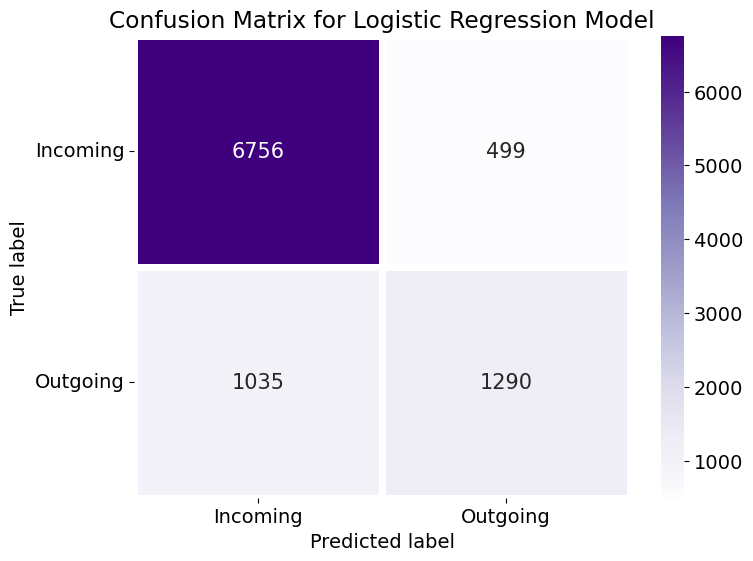

In [80]:
#Confusion matrix and classification report for model evaluation

CM(y_test, y_pred, col_names=col_names, model='Logistic Regression')

### Confusion Matrix: Interpretation

* The diagonal elements are the correctly predicted samples. 

* True positive: 6756 records of Incoming were predicted correctly by the model.

* False-positive: 499 records of Outgoing were wrongly predicted as Incoming by the model.

* False-negative: 1035 records of Outgoing were wrongly predicted as Incoming records

* True Negative: 1290 records of Outgoing were predicted correctly by the model.

In [81]:
y_ac = accuracy_score(y_test, y_pred)

print(f'Accuracy Score: {y_ac:.3f}\n')

Accuracy Score: 0.840



* Accuracy. The number of samples correctly classified out of all the samples present in the test set.
* For our case, the model is 84% accurate

In [82]:
y_pred_df = pd.DataFrame(pd.Series(y_pred).value_counts(), columns=['Test Outcome'])
pd.concat([y_test.value_counts(), y_pred_df], axis=1)

,call_direction,Test Outcome
0,7255,7791
1,2325,1789


In [83]:
#report = classification_report(y_test, y_pred, labels=np.unique(y_pred), target_names=["Current", "Previous", "Unspecified"])
report = classification_report(y_test, y_pred, target_names=["Incoming", "Outgoing"])
print(report)

              precision    recall  f1-score   support

    Incoming       0.87      0.93      0.90      7255
    Outgoing       0.72      0.55      0.63      2325

    accuracy                           0.84      9580
   macro avg       0.79      0.74      0.76      9580
weighted avg       0.83      0.84      0.83      9580



> Classification Report Interpretation:
1. Precision: Out of all the "call_direction" that the model predicted, 87% actually were Incoming whereas 72% were Outgoing.
2. Recall: Out of all the "call_direction" data that the model predicted, 93% of the outcome was correct for Incoming and likewise 55% for Outgoing.
3. F1 Score: This value is calculated as:
    • F1 Score: 2 * (Precision * Recall) / (Precision + Recall) 
    • F1 Scores: 0.90 and 0.63 for Incoming and Outgoing respectively.
Since these values are very close to 1, it tells us that the model does a good job of predicting whether the call_direction was Incoming or Outgoing.
4. Support: These values simply tell us how many samples belonged to each class in the test dataset. We can see that among the samples in the test dataset, 7255 were Incoming and 2325 were Outgoing.

#### Approach Two: Decision Tree Model

In [84]:
# Decision tree classifier

from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()

# Fitting Model
DT.fit(X_train, y_train)

# Getting Predictions
DT_pred = DT.predict(X_test)

In [85]:
DT_ac = accuracy_score(y_test, DT_pred)

print(f'Accuracy Score: {DT_ac:.3f}\n')

Accuracy Score: 0.957



* DT gives us 96% accuracy

In [86]:
#Actual value and the predicted value
a = pd.DataFrame({'Actual value': y_test, 'Predicted value':DT_pred})
a.sample(20)

,Actual value,Predicted value
20518,0,0
11086,0,0
16961,0,0
32005,0,0
12706,0,0
26702,1,1
14488,1,1
31935,1,1
4047,0,0
7260,0,0


In [87]:
DT_pred_df = pd.DataFrame(pd.Series(DT_pred).value_counts(), columns=['Test Outcome'])
pd.concat([y_test.value_counts(), DT_pred_df], axis=1)

,call_direction,Test Outcome
0,7255,7272
1,2325,2308


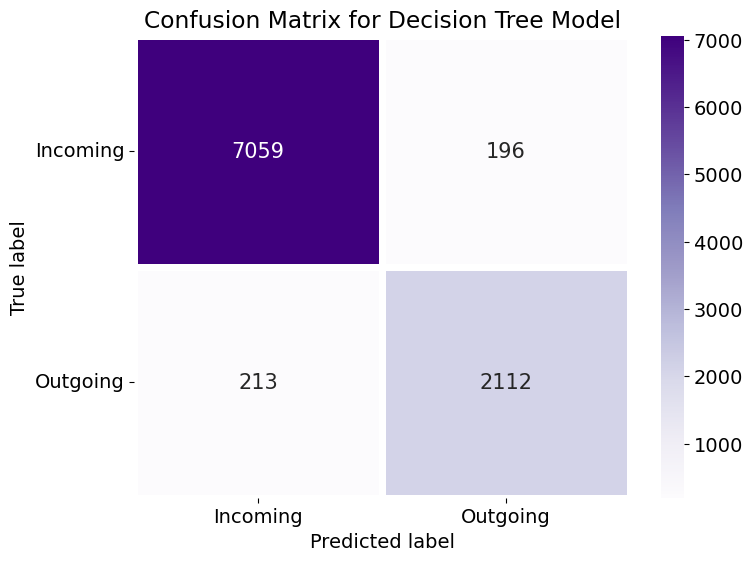

In [88]:
CM(y_test, DT_pred, col_names=col_names, model='Decision Tree')

### Confusion Matrix: Interpretation

* The diagonal elements are the correctly predicted samples. 

* True positive: 7059 records of Incoming were predicted correctly by the model.

* False-positive: 196 records of Outgoing were wrongly predicted as Incoming by the model.

* False-negative: 213 records of Outgoing were wrongly predicted as Incoming records

* True Negative: 2112 records of Outgoing were predicted correctly by the model.

In [89]:
#report = classification_report(y_test, y_pred, labels=np.unique(y_pred), target_names=["Current", "Previous", "Unspecified"])
report = classification_report(y_test, DT_pred, target_names=["Incoming", "Outgoing"])
print(report)

              precision    recall  f1-score   support

    Incoming       0.97      0.97      0.97      7255
    Outgoing       0.92      0.91      0.91      2325

    accuracy                           0.96      9580
   macro avg       0.94      0.94      0.94      9580
weighted avg       0.96      0.96      0.96      9580



> Classification Report Interpretation:
1. Precision: Out of all the "call_direction" that the model predicted, 97% actually were Incoming whereas 92% were Outgoing.
2. Recall: Out of all the "call_direction" data that the model predicted, 97% of the outcome was correct for Incoming and likewise 91% for Outgoing.
3. F1 Score: This value is calculated as:
    • F1 Score: 2 * (Precision * Recall) / (Precision + Recall) 
    • F1 Scores: 0.97 and 0.91 for Incoming and Outgoing respectively.
Since this values are very close to 1, it tells us that the model does a good job of predicting whether the call_direction was Incoming or Outgoing.
4. Support: These values simply tell us how many samples belonged to each class in the test dataset. We can see that among the samples in the test dataset, 7255 were Incoming and 2325 were Outgoing.

#### Approach Three: Naive Bayes Model

In [90]:
# training the model on training set
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB().fit(X_train, y_train)

In [91]:
# making predictions on the testing set
y_pred_gnb = gnb.predict(X_test)

In [92]:
# comparing actual response values (y_test) with predicted response values (y_pred)
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred_gnb)*100)

Gaussian Naive Bayes model accuracy(in %): 86.15866388308977


In [93]:
#Actual value and the predicted value
a = pd.DataFrame({'Actual value': y_test, 'Predicted value':y_pred_gnb})
a.sample(10)

,Actual value,Predicted value
10453,0,1
19050,0,0
656,1,1
18439,1,1
24863,0,0
20346,0,0
16715,1,1
8384,0,0
31928,1,1
7285,0,0


In [94]:
NBM_pred_df = pd.DataFrame(pd.Series(y_pred_gnb).value_counts(), columns=['Test Outcome'])
pd.concat([y_test.value_counts(), NBM_pred_df], axis=1)

,call_direction,Test Outcome
0,7255,7435
1,2325,2145


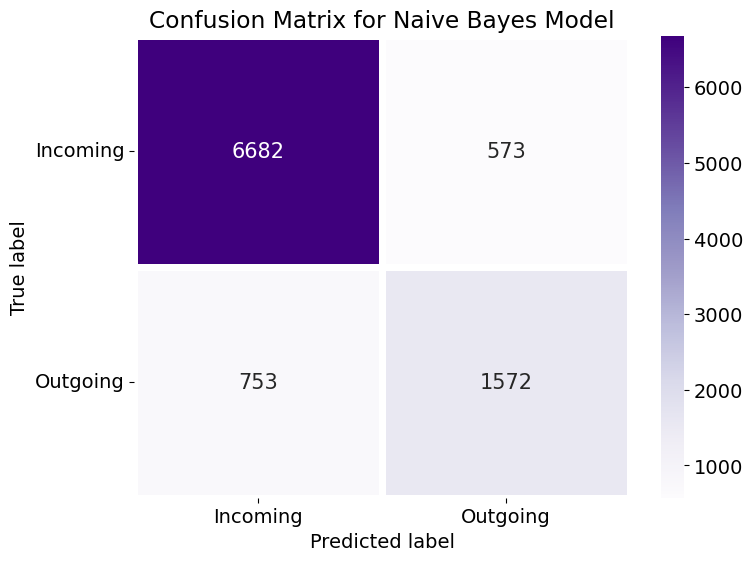

In [95]:
CM(y_test, y_pred_gnb, col_names=col_names, model='Naive Bayes')

### Confusion Matrix: Interpretation

* The diagonal elements are the correctly predicted samples. 

* True positive: 6682 records of Incoming were predicted correctly by the model.

* False-positive: 573 records of Outgoing were wrongly predicted as Incoming by the model.

* False-negative: 753 records of Outgoing were wrongly predicted as Incoming records

* True Negative: 1572 records of Outgoing were predicted correctly by the model.

In [96]:
#report = classification_report(y_test, y_pred, labels=np.unique(y_pred), target_names=["Incoming", "Outgoing"])
report = classification_report(y_test, y_pred_gnb, target_names=["Incoming", "Outgoing"])
print(report)

              precision    recall  f1-score   support

    Incoming       0.90      0.92      0.91      7255
    Outgoing       0.73      0.68      0.70      2325

    accuracy                           0.86      9580
   macro avg       0.82      0.80      0.81      9580
weighted avg       0.86      0.86      0.86      9580



> Classification Report Interpretation:
1. Precision: Out of all the "call_direction" that the model predicted, 90% actually were Incoming whereas 73% were Outgoing.

2. Recall: Out of all the "call_direction" data that the model predicted, 92% of the outcome was correct for Incoming and likewise 68% for Outgoing.

3. F1 Score: This value is calculated as:
    • F1 Score: 2 * (Precision * Recall) / (Precision + Recall) 
    • F1 Scores: 0.91 and 0.70 for Incoming and Outgoing respectively.
Since this values are very close to 1, it tells us that the model does a good job of predicting whether the call_direction was Incoming or Outgoing.

4. Support: These values simply tell us how many samples belonged to each class in the test dataset. We can see that among the samples in the test dataset, 7255 were Incoming and 2325 were Outgoing.